Loaded data shape: (500, 3)
Total points loaded: 500
Estimated data range: 0.26
Using max_edge_length: 0.01

--- Vietoris-Rips Complex Information ---
Successfully created a Vietoris-Rips Complex.
Number of simplices in the complex: 3065
Dimension of the complex: 2

Computing persistent homology...
Number of persistence pairs: 1171
Plotting persistence diagram...


/home/isabella/Develop/LabComp/ve/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:134: UserWarning: usetex mode requires dvipng.
  warnings.warn("usetex mode requires dvipng.")


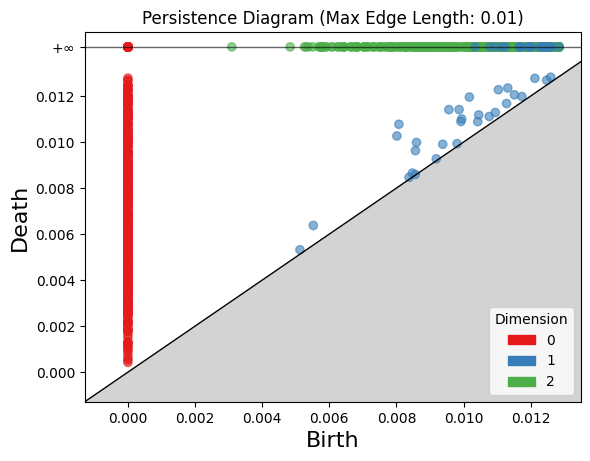

Plotting persistence barcode...


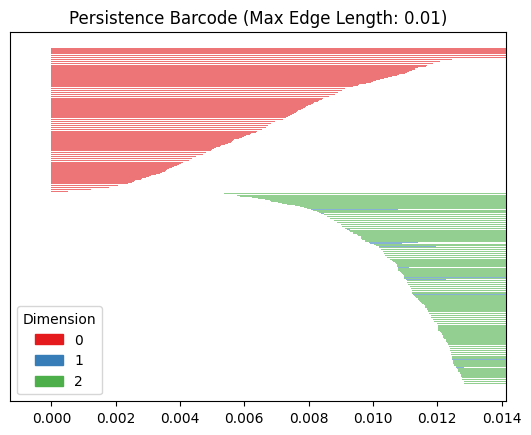

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

points = np.load('dragon_vrip_sampled_500.npy')

print(f"Loaded data shape: {points.shape}")
num_points_loaded = points.shape[0]

# 1. Define the points for the Rips Complex

if num_points_loaded == 0:
    print("Error: No points loaded to create a complex.")
    # Exit or handle error appropriately if no points are loaded
else:
    # 2. Determine max_edge_length
    # max_edge_length defines the maximum distance between any two points that will form an edge in the complex.
    # Higher values will lead to larger, denser complexes.
    # A heuristic to estimate `max_alpha_value` is to consider a fraction of the data's overall range or diameter

    min_coords = np.min(points, axis=0)
    max_coords = np.max(points, axis=0)
    data_range = np.linalg.norm(max_coords - min_coords) # Diagonal length of bounding box
    
    max_edge_length = data_range * 0.05
    
    # Fallback for very small or zero range
    if max_edge_length < 1e-6:
        max_edge_length = 1.0 

    print(f"Total points loaded: {num_points_loaded}")
    print(f"Estimated data range: {data_range:.2f}")
    print(f"Using max_edge_length: {max_edge_length:.2f}")

    try:
        # 3. Create the Rips Complex instance
        rips_complex = gd.RipsComplex(
            points=points,
            max_edge_length=max_edge_length # The critical parameter
        )

        # 4. Create the Simplex Tree from the Rips complex
        # Build the simplicial complex up to the specified dimension.
        # By default, create_simplex_tree will build up to the maximum possible dimension implied by the number of points and max_edge_length.
        simplex_tree_rips = rips_complex.create_simplex_tree(max_dimension=2)

        print("\n--- Vietoris-Rips Complex Information ---")
        print(f"Successfully created a Vietoris-Rips Complex.")
        print(f"Number of simplices in the complex: {simplex_tree_rips.num_simplices()}")
        print(f"Dimension of the complex: {simplex_tree_rips.dimension()}")

        # 5. Compute persistent homology
        print("\nComputing persistent homology...")
        persistence_rips = simplex_tree_rips.persistence(persistence_dim_max=True)
        print(f"Number of persistence pairs: {len(persistence_rips)}")

        # Plot the persistence diagram
        if len(persistence_rips) > 0:
            print("Plotting persistence diagram...")
            gd.plot_persistence_diagram(persistence_rips)
            plt.title(f"Persistence Diagram (Max Edge Length: {max_edge_length:.2f})")
            plt.show()
            print("Plotting persistence barcode...")
            gd.plot_persistence_barcode(persistence_rips)
            plt.title(f"Persistence Barcode (Max Edge Length: {max_edge_length:.2f})")
            plt.show()
        else:
            print("No persistence pairs found for Rips Complex (complex might be too sparse).")

    except Exception as e:
        print(f"\nAn error occurred while creating the Rips Complex: {e}")
        print("This often happens if 'max_edge_length' is too small, or the data is not suitable.")